In [4]:
import os
import csv
import subprocess
import array
import random
import pandas as pd
import numpy as np
from pyAudioAnalysis import audioSegmentation as aS
from itertools import groupby
from operator import itemgetter
from IPython.display import display, Audio
from pydub import AudioSegment
from pydub.utils import get_array_type
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Takes list of 1-second segments classified as creeley (1.0) or 
# non-creeley (0.0) and returns list of 2-tuples specifying creeley ranges.
# Add 1 to 2nd value in each 2-tuple for inclusive time span.
def seconds_list_to_ranges(seconds_list): 
    ranges = []                
    for k, g in groupby(enumerate(seconds_list), lambda (i,x):i-x):
        group = map(itemgetter(1), g)
        ranges.append((group[0], group[-1]))
    return ranges


# Displays specified audio segment in Jupyter window using IPython.display
def display_clip(wav_path,start_time,end_time):
    track_data = AudioSegment.from_wav(file=wav_path)
    track_data = track_data.set_channels(1)
    bit_depth = track_data.sample_width * 8
    clip_data = track_data[int(1000*start_time):int(1000*end_time)]
    array_type = get_array_type(bit_depth)
    numeric_array = array.array(array_type, clip_data._data)
    display(Audio(numeric_array, rate=track_data.frame_rate))

# Classifies audio at 1-second resolution, plots results if creeley found, 
# and returns creeley ranges as list of 2-tuples.
# Add 1 to 2nd value in each 2-tuple for inclusive time span.
def find_creeley(audio_path):
    buffer_secs=0
    is_mp3=False
    if audio_path.lower()[-4:]=='.mp3':    # Creates a temporary WAV
        is_mp3=True                        # if input is MP3
        random.seed(audio_path)
        wav_path='/var/tmp/'+str(random.random())+'_temp.wav' # Filename for temp WAV is a random float
        subprocess.call(['ffmpeg', '-y', '-i', audio_path, wav_path]) # '-y' option overwrites existing file if present
    else:
        wav_path=audio_path
    classifier_model_path = "/Users/mclaugh/Dropbox/WGBH_ARLO_Project/audio-tagging-toolkit/data/svm_king" # Or replace with sklearn model pathname
    output, classesAll, acc, CM = aS.mtFileClassification(wav_path, classifier_model_path, "svm")
    output = list(output)
    counter=0
    creeley_secs=[]
    for value in output:
        if value>0.0:
            creeley_secs.append(counter)
        counter+=1
    creeley_ranges=seconds_list_to_ranges(creeley_secs)
    if len(creeley_ranges)>0:
        print creeley_ranges
        print '\n'
        pd.Series(output).plot()
        plt.show()
    for pair in creeley_ranges:
        print pair
        display_clip(wav_path,pair[0],pair[1]+1)
    if is_mp3==True:
        os.remove(wav_path)
    outputfile=audio_path[:-4]+'_creeley_svm.csv'
    with open(outputfile, 'w') as csv_fo:
        creeley_ranges_expanded=[(start,1,end-start+1) for start,end in creeley_ranges]
        csv_writer = csv.writer(csv_fo)
        csv_writer.writerows(creeley_ranges_expanded)
    return creeley_ranges_expanded

[(22, 23), (34, 35), (68, 71), (104, 105), (119, 120)]




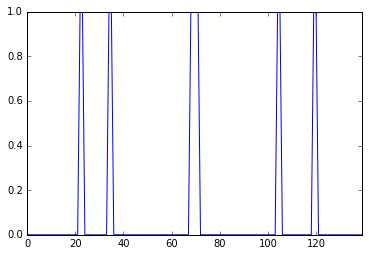

(22, 23)


(34, 35)


(68, 71)


(104, 105)


(119, 120)


In [3]:
# Example creeley search on public speech from WGBH

audio_path="/Users/mclaugh/Dropbox/test_set_50_clips/Steinem, Gloria|2182|140s|cpb-aacip-15-xd0qr4p33v__4234-2008_10_12_.h264.wav"

dd=find_creeley(audio_path)

[(12, 13)]




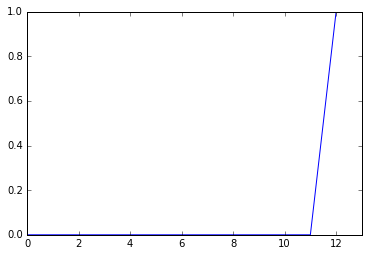

(12, 13)


[(12, 1, 2)]

In [6]:
audio_path="/Users/mclaugh/Dropbox/test_set_50_clips/Buckley, William F.|584|14s|cpb-aacip-500-w6697g47.wav"
find_creeley(audio_path)

[(2, 3), (6, 7), (13, 14), (22, 28), (31, 32), (35, 42), (46, 50)]




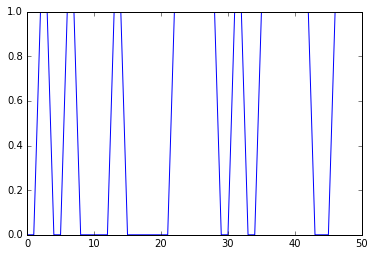

(2, 3)


(6, 7)


(13, 14)


(22, 28)


(31, 32)


(35, 42)


(46, 50)


[(2, 1, 2),
 (6, 1, 2),
 (13, 1, 2),
 (22, 1, 7),
 (31, 1, 2),
 (35, 1, 8),
 (46, 1, 5)]

In [33]:
# Example creeley search on poetry reading from PennSound

audio_path="/Users/mclaugh/Desktop/Creeley_training_set/not_creeley/Gizzi-Michael_13_Hypnotists-incubate_Cured-in-the-Going_2002.mp3"

find_creeley(audio_path)

In [ ]:
audio_path="/Users/mclaugh/Desktop/Creeley_training_set/media.sas.upenn.edu/pennsound/authors/Creeley/Radio-France_Albatros_1993/Creeley-Robert-Darras-Jacque_01_Ballade-pour-Robert-Creeley-pt1_c-1993.mp3"


find_creeley(audio_path)